<a href="https://www.kaggle.com/code/yahyasoker/imdb-emotion-analysis?scriptVersionId=130720823" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. [Loading Data](#1)
1. [EDA](#2)
1. [Preprocess](#3)
1. [Recurrent Neural Network](#4)
1. [Creating RNN](#5)
1. [Training RNN](#6)

<a id = "1"></a><br>
# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation
import warnings
warnings.filterwarnings ('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train,x_test),(y_train,y_test) = imdb.load_data(path="inbdb.npz",
                                                   num_words=None, skip_top = 0, 
                                                   maxlen = None, seed = 113, 
                                                   start_char = 1,oov_char = 2, 
                                                   index_from= 3)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(f"Type: {type(x_train)}"),print(f"X Train Shape: {x_train.shape}"),print(f"Y Train Shape: {y_train.shape}")

Type: <class 'numpy.ndarray'>
X Train Shape: (25000,)
Y Train Shape: (25000,)


(None, None, None)

<a id = "2"></a><br>
# EDA 

<AxesSubplot: ylabel='Density'>

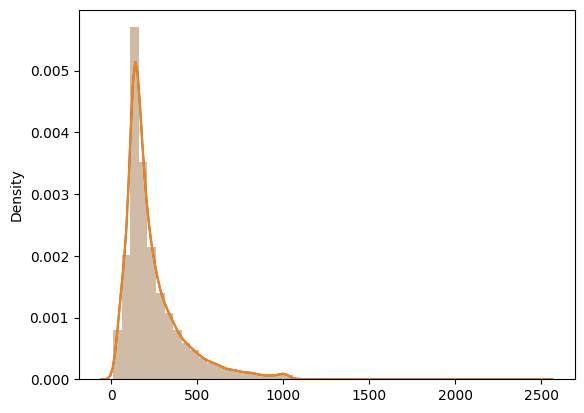

In [4]:
review_len_train = [] 
review_len_test = []
for i, ii in zip (x_train, x_test):
    review_len_train.append(len(i))
    review_len_test.append(len(i))

sns.distplot (review_len_train, hist_kws = {"alpha":0.3})
sns.distplot (review_len_test, hist_kws={"alpha":0.3})

In [5]:
print(f"Train mean : {np.mean(review_len_train)}")
print(f"Train median : {np.median(review_len_train)}")
print(f"Train mode: {stats.mode(review_len_train)}")

Train mean : 238.71364
Train median : 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))


In [6]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

1641221/1641221 [==============================] - 0s 0us/step
<class 'dict'>
88584


In [7]:
for keys, values in word_index.items():
    if values == 22: print(keys)
        
        
def whatItSay(index=24):
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review =" ".join([reverse_index.get(i-3, "!") for i in x_train [index]])
    print(decode_review)
    print()
    print(y_train [index])
    return decode_review
decoded_review = whatItSay (1)

you
! big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then

[1,

<a id = "3"></a><br>
# Preprocess

In [8]:
num_words = 15000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
max_len = 130

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test.tolist(), maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [9]:
decoded_review = whatItSay(20)

! ! shown in australia as ! this incredibly bad movie is so bad that you become ! and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school ! class the sets are pathetic but marginally better than the ! and the acting is wooden br br the infant ! seems to have been stolen from the props ! of ! ! there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money

0


<a id = "4"></a><br>
# Recurrent Neural Network

<a id = "5"></a><br>
## Creating RNN

In [10]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length= len(x_train[0])))
rnn.add(SimpleRNN(16, input_shape= (num_words,max_len), 
                   return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop", metrics= ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


<a id = "6"></a><br>
## Training RNN

In [11]:
history = rnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
196/196 [==============================] - 8s 34ms/step - loss: 0.6139 - accuracy: 0.6686 - val_loss: 0.4592 - val_accuracy: 0.8175
Epoch 2/5
196/196 [==============================] - 7s 33ms/step - loss: 0.3963 - accuracy: 0.8344 - val_loss: 0.3841 - val_accuracy: 0.8230
Epoch 3/5
196/196 [==============================] - 7s 34ms/step - loss: 0.3115 - accuracy: 0.8713 - val_loss: 0.3570 - val_accuracy: 0.8526
Epoch 4/5
196/196 [==============================] - 7s 34ms/step - loss: 0.2661 - accuracy: 0.8941 - val_loss: 0.3374 - val_accuracy: 0.8612
Epoch 5/5
196/196 [==============================] - 8s 39ms/step - loss: 0.2294 - accuracy: 0.9097 - val_loss: 0.3276 - val_accuracy: 0.8641


In [12]:
score =rnn.evaluate(x_test,y_test)
print(f"Accuracy : %{score[1]*100}")

782/782 [==============================] - 5s 6ms/step - loss: 0.3276 - accuracy: 0.8641
Accuracy : %86.4080011844635


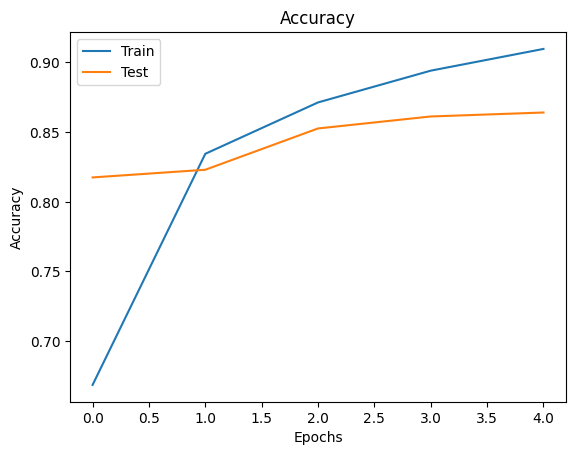

In [13]:
plt.figure()
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

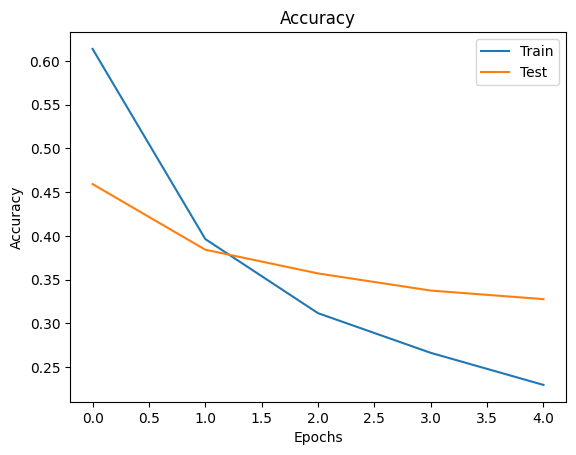

In [14]:
plt.figure()
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Test")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()